# Given a line and an ellipsoid, computes the point of closest approach between a line and the ellipsoid

In [40]:
import sympy as sp
import numpy as np

In [41]:
x0,y0,z0,t,e,f,g,a,b,c,x,y,z,H = sp.symbols('x0,y0,z0,t,e,f,g,a,b,c,x,y,z,H',real=True)

# Line Equations

In [42]:
xeqn = x0+t*e
yeqn = y0+t*f
zeqn = z0+t*g
dxdt = e
dydt = f
dzdt = g
dydx_line = f/e
dydz_line = f/g

# Ellipsoid Equations

In [43]:
ellipseEqn = x**2/a**2 + y**2/b**2+z**2/c**2-H
dxdH = a**2/(2*x)
dydH = b**2/(2*y)
dzdH = c**2/(2*z)
dydx_ellipse = dydH/dxdH
dydz_ellipse = dydH/dzdH

In [44]:
eqn1 = dydx_line - dydx_ellipse
eqn2 = dydz_line - dydz_ellipse

In [45]:
#Substitute in line equation in terms of x,y,z and solve for t

In [46]:
teqn1 = sp.solve(eqn1.subs(x,xeqn).subs(y,yeqn),t)

In [47]:
teqn1[0]

(-a**2*f*y0 + b**2*e*x0)/(a**2*f**2 - b**2*e**2)

In [48]:
teqn2 = sp.solve(eqn2.subs(z,zeqn).subs(y,yeqn),t)

In [49]:
teqn2[0]

(-b**2*g*z0 + c**2*f*y0)/(b**2*g**2 - c**2*f**2)

In [50]:
 import matplotlib.pyplot as plt

In [65]:
tmpa = 1.
tmpb = 1.
tmpc = 1.
tmpx0 = 2.
tmpy0 = -1.
tmpz0 = 0.
tmpe = 0.
tmpf = 1.
tmpg = 0.
tmpH = 1.

In [70]:
trange = np.linspace(-2,2)
#teqn.subs(z0,0).subs(z,0)

/tmp/ipykernel_460716/243984931.py:25: RuntimeWarning: invalid value encountered in sqrt
  zl = -np.sqrt((tmpH-xrange[i]**2./tmpa**2.-yrange[j]**2./tmpb**2.)*tmpc**2.)


IndexError: list index out of range

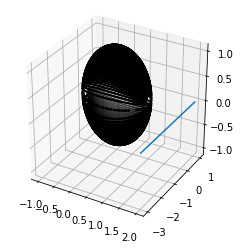

In [97]:
fig3 = plt.figure(2903850928354)
ax3 = fig3.add_subplot(111, projection='3d',computed_zorder=False)
ax3.set_box_aspect(aspect = (3,3,3))#set_aspect('equal')
#Draw Line
outx = list()
outy = list()
outz = list()
for i in np.arange(len(trange)):
    outx.append(xeqn.subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(x0,tmpx0).subs(y0,tmpy0).subs(z0,tmpz0).subs(e,tmpe).subs(f,tmpf).subs(g,tmpg).subs(H,tmpH).subs(t,trange[i]))
    outy.append(yeqn.subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(x0,tmpx0).subs(y0,tmpy0).subs(z0,tmpz0).subs(e,tmpe).subs(f,tmpf).subs(g,tmpg).subs(H,tmpH).subs(t,trange[i]))
    outz.append(zeqn.subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(x0,tmpx0).subs(y0,tmpy0).subs(z0,tmpz0).subs(e,tmpe).subs(f,tmpf).subs(g,tmpg).subs(H,tmpH).subs(t,trange[i]))
ax3.plot(outx,outy,outz)
#Draw Sphere
xs = list()
ys = list()
zs = list()
xmin = -np.sqrt(tmpH*tmpa**2.)
xmax = -xmin
xrange = np.linspace(start=xmin, stop=xmax,num=100,endpoint=True)
for i in np.arange(len(xrange)):
    ymin = -np.sqrt((tmpH-xrange[i]**2/tmpa**2)*tmpb**2.)
    ymax = -ymin
    yrange = np.linspace(start=ymin,stop=ymax,num=100,endpoint=True)
    for j in np.arange(len(yrange)):
        zl = -np.sqrt((tmpH-xrange[i]**2./tmpa**2.-yrange[j]**2./tmpb**2.)*tmpc**2.)
        zu = -zl
        xs.append(xrange[i])
        ys.append(yrange[j])
        zs.append(zl)
        xs.append(xrange[i])
        ys.append(yrange[j])
        zs.append(zu)
#ax3.scatter(xrange[i],yrange[j],zl,color='black')
#ax3.scatter(xrange[i],yrange[j],zu,color='black')
ax3.scatter(xs,ys,zs,color='black',s=1)


tmpt = teqn1[0].subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(x0,tmpx0).subs(y0,tmpy0).subs(z0,tmpz0).subs(e,tmpe).subs(f,tmpf).subs(g,tmpg).subs(H,tmpH)
xpt = xeqn.subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(x0,tmpx0).subs(y0,tmpy0).subs(z0,tmpz0).subs(e,tmpe).subs(f,tmpf).subs(g,tmpg).subs(H,tmpH).subs(t,tmpt)
ypt = yeqn.subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(x0,tmpx0).subs(y0,tmpy0).subs(z0,tmpz0).subs(e,tmpe).subs(f,tmpf).subs(g,tmpg).subs(H,tmpH).subs(t,tmpt)
zpt = zeqn.subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(x0,tmpx0).subs(y0,tmpy0).subs(z0,tmpz0).subs(e,tmpe).subs(f,tmpf).subs(g,tmpg).subs(H,tmpH).subs(t,tmpt)
ax3.scatter(xpt,ypt,zpt,color='red')

plt.show(block=False)

In [98]:
#### t of zenith line from point on ellipse to tangent point
xt, yt, zt = sp.symbols("x_t, y_t, z_t",real=True)
x1eqn = xt/(1-2*t/a**2)
y1eqn = yt/(1-2*t/b**2)
z1eqn = zt/(1-2*t/c**2)
#teqn1 = sp.solve(ellipseEqn.subs(x,x1eqn).subs(y,y1eqn).subs(z,z1eqn),t)

In [115]:
#ellipse equation
t_of_zenith = sp.solve(sp.simplify(ellipseEqn.subs(x,x1eqn).subs(y,y1eqn).subs(z,z1eqn).subs(xt,xpt[0]).subs(yt,ypt[0]).subs(zt,zpt).subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(H,tmpH)),t)

In [132]:
sp.expand(ellipseEqn.subs(x,x1eqn).subs(y,y1eqn).subs(z,z1eqn))

-H + x_t**2/(a**2 - 4*t + 4*t**2/a**2) + y_t**2/(b**2 - 4*t + 4*t**2/b**2) + z_t**2/(c**2 - 4*t + 4*t**2/c**2)

In [116]:
t_of_zenith

[-0.500000000000000, 1.50000000000000]

In [119]:
x1 = x1eqn.subs(a,tmpa).subs(xt,xpt[0]).subs(yt,ypt[0]).subs(zt,zpt).subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(H,tmpH).subs(t,t_of_zenith[0])
y1 = y1eqn.subs(a,tmpa).subs(xt,xpt[0]).subs(yt,ypt[0]).subs(zt,zpt).subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(H,tmpH).subs(t,t_of_zenith[0])
z1 = z1eqn.subs(a,tmpa).subs(xt,xpt[0]).subs(yt,ypt[0]).subs(zt,zpt).subs(a,tmpa).subs(b,tmpb).subs(c,tmpc).subs(H,tmpH).subs(t,t_of_zenith[0])

In [123]:
x1

1.00000000000000

In [122]:
y1

0

In [113]:
z1

0

# Formulation 2

In [203]:
P0x, P0y, P0z, P1x, P1y, P1z = sp.symbols("P_{0x}, P_{0y}, P_{0z}, P_{1x}, P_{1y}, P_{1z}",real=True)

In [204]:
eqn1 = (-e*P0x+e*x0-f*P0y+f*y0-g*P0z+g*z0)/(e**2+f**2+g**2)

In [205]:
eqn1 #=t

(-P_{0x}*e - P_{0y}*f - P_{0z}*g + e*x0 + f*y0 + g*z0)/(e**2 + f**2 + g**2)

In [206]:
zeroEqn2 = e*b**2*c**2*x0 + f*a**2*c**2*y0 + g*a**2*b**2*z0 #=0

In [207]:
zeroEqn2

a**2*b**2*g*z0 + a**2*c**2*f*y0 + b**2*c**2*e*x0

In [208]:
zeroEqn3 = x0**2/a**2 + y0**2/b**2 + z0**2/c**2 - H

In [209]:
zeroEqn3

-H + z0**2/c**2 + y0**2/b**2 + x0**2/a**2

In [210]:
zeroEqn4 = e*x0 - e*(e*t+P0x) + f*y0 - f*(f*t+P0y) + g*z - g*(g*t+P0z)

In [211]:
zeroEqn4

e*x0 - e*(P_{0x} + e*t) + f*y0 - f*(P_{0y} + f*t) + g*z - g*(P_{0z} + g*t)

In [212]:
gammaEqn = sp.sqrt((P1x-x0)**2+(P1y-y0)**2+(P1z-z0)**2)
eqnOfPlane = (f*(P1z-z0)-g*(P1y-y0))*(x-P0x) + (g*(P1x-x0)-e*(P1z-z0))*(y-P0y) + (e*(P1y-y0)-f*(P1x-x0))*(z-P0z)#/gammaEqn=0

In [213]:
sp.expand(eqnOfPlane)

P_{0x}*P_{1y}*g - P_{0x}*P_{1z}*f + P_{0x}*f*z0 - P_{0x}*g*y0 - P_{0y}*P_{1x}*g + P_{0y}*P_{1z}*e - P_{0y}*e*z0 + P_{0y}*g*x0 + P_{0z}*P_{1x}*f - P_{0z}*P_{1y}*e + P_{0z}*e*y0 - P_{0z}*f*x0 - P_{1x}*f*z + P_{1x}*g*y + P_{1y}*e*z - P_{1y}*g*x - P_{1z}*e*y + P_{1z}*f*x + e*y*z0 - e*y0*z - f*x*z0 + f*x0*z + g*x*y0 - g*x0*y

In [214]:
sp.solve(sp.expand(eqnOfPlane),x0)

[(-P_{0x}*P_{1y}*g + P_{0x}*P_{1z}*f - P_{0x}*f*z0 + P_{0x}*g*y0 + P_{0y}*P_{1x}*g - P_{0y}*P_{1z}*e + P_{0y}*e*z0 - P_{0z}*P_{1x}*f + P_{0z}*P_{1y}*e - P_{0z}*e*y0 + P_{1x}*f*z - P_{1x}*g*y - P_{1y}*e*z + P_{1y}*g*x + P_{1z}*e*y - P_{1z}*f*x - e*y*z0 + e*y0*z + f*x*z0 - g*x*y0)/(P_{0y}*g - P_{0z}*f + f*z - g*y)]

In [215]:
eqn5 = sp.solve(sp.expand(eqnOfPlane),x0)[0]

In [216]:
eqn5

(-P_{0x}*P_{1y}*g + P_{0x}*P_{1z}*f - P_{0x}*f*z0 + P_{0x}*g*y0 + P_{0y}*P_{1x}*g - P_{0y}*P_{1z}*e + P_{0y}*e*z0 - P_{0z}*P_{1x}*f + P_{0z}*P_{1y}*e - P_{0z}*e*y0 + P_{1x}*f*z - P_{1x}*g*y - P_{1y}*e*z + P_{1y}*g*x + P_{1z}*e*y - P_{1z}*f*x - e*y*z0 + e*y0*z + f*x*z0 - g*x*y0)/(P_{0y}*g - P_{0z}*f + f*z - g*y)

In [218]:
zeroEqn2.subs(x0,eqn5)

a**2*b**2*g*z0 + a**2*c**2*f*y0 + b**2*c**2*e*(-P_{0x}*P_{1y}*g + P_{0x}*P_{1z}*f - P_{0x}*f*z0 + P_{0x}*g*y0 + P_{0y}*P_{1x}*g - P_{0y}*P_{1z}*e + P_{0y}*e*z0 - P_{0z}*P_{1x}*f + P_{0z}*P_{1y}*e - P_{0z}*e*y0 + P_{1x}*f*z - P_{1x}*g*y - P_{1y}*e*z + P_{1y}*g*x + P_{1z}*e*y - P_{1z}*f*x - e*y*z0 + e*y0*z + f*x*z0 - g*x*y0)/(P_{0y}*g - P_{0z}*f + f*z - g*y)

In [222]:
eqn6 = sp.solve(zeroEqn2.subs(x0,eqn5),y0)[0]

In [223]:
eqn6

b**2*(P_{0x}*P_{1y}*c**2*e*g - P_{0x}*P_{1z}*c**2*e*f + P_{0x}*c**2*e*f*z0 - P_{0y}*P_{1x}*c**2*e*g + P_{0y}*P_{1z}*c**2*e**2 - P_{0y}*a**2*g**2*z0 - P_{0y}*c**2*e**2*z0 + P_{0z}*P_{1x}*c**2*e*f - P_{0z}*P_{1y}*c**2*e**2 + P_{0z}*a**2*f*g*z0 - P_{1x}*c**2*e*f*z + P_{1x}*c**2*e*g*y + P_{1y}*c**2*e**2*z - P_{1y}*c**2*e*g*x - P_{1z}*c**2*e**2*y + P_{1z}*c**2*e*f*x - a**2*f*g*z*z0 + a**2*g**2*y*z0 + c**2*e**2*y*z0 - c**2*e*f*x*z0)/(c**2*(P_{0x}*b**2*e*g + P_{0y}*a**2*f*g - P_{0z}*a**2*f**2 - P_{0z}*b**2*e**2 + a**2*f**2*z - a**2*f*g*y + b**2*e**2*z - b**2*e*g*x))

In [ ]:
zeroEqn3.subs()